In [82]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter
%matplotlib inline
from __future__ import division
from __future__ import print_function
from scipy.optimize import curve_fit
import os

[This notebook](http://nbviewer.ipython.org/gist/keflavich/4042018) has a good tutorial on curve fitting. Note the use of np.polyfit(), np.polyval(), and curve_fit() from scipy.optimize.

In [6]:
#help(np.polyfit)

In [4]:
#help(np.polyval)

In [9]:
#help(curve_fit)

In [47]:
datadirectory = 'membrane_thickness_data'
def makename(filename):
    return os.path.join(datadirectory,filename)

In [56]:
filename1 = 'Exp150330_Irgacure_1.0_UV326_1.0_.csv'
data1 = np.loadtxt(makename(filename1), delimiter=',', skiprows=1)
print(data1)

[[   0.3    54.5     9.49]
 [   0.35  105.7    15.94]
 [   0.4   127.62   13.19]
 [   0.45  185.95   15.6 ]
 [   0.5   197.56   16.36]]


<Container object of 3 artists>

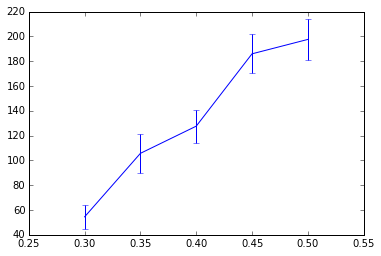

In [57]:
fig, ax = plt.subplots()
ax.errorbar(data1[:,0],data1[:,1],data1[:,2])

In [63]:
def membthickfunc(t,a,b):
    return a*np.log(t/b)
def membthickfunc_test1(t,a):
    return a*(t)

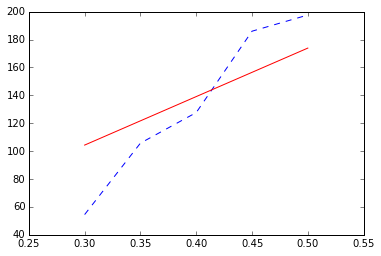

In [69]:
fitpars, covmat = curve_fit(membthickfunc_test1, data1[:,0], data1[:,1])#, p0=[0.01,0.24])
plt.plot(data1[:,0],data1[:,1],'b--')
plt.plot(data1[:,0], membthickfunc_test1(data1[:,0], *fitpars), 'r-')

/Users/nordin/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:2: RuntimeWarning: invalid value encountered in log
  from IPython.kernel.zmq import kernelapp as app


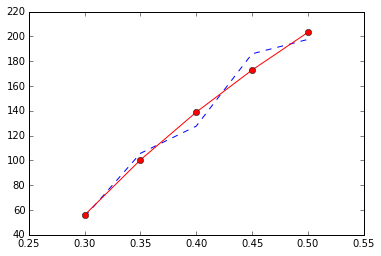

In [75]:
fitpars, covmat = curve_fit(membthickfunc, data1[:,0], data1[:,1])#, p0=[0.01,0.24])
std_devs = np.sqrt(covmat.diagonal())
plt.plot(data1[:,0],data1[:,1],'b--')
plt.plot(data1[:,0], membthickfunc(data1[:,0], *fitpars), 'r-', marker='o')

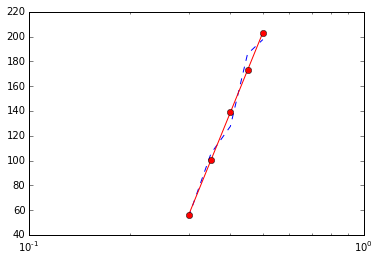

In [73]:
plt.semilogx(data1[:,0],data1[:,1],'b--')
plt.semilogx(data1[:,0], membthickfunc(data1[:,0], *fitpars), 'r-', marker='o')

In [78]:
print('fit params:', fitpars)
print('    stdevs:', std_devs)

fit params: [  2.88233065e+02   2.47048025e-01]
    stdevs: [  2.71746517e+01   1.16362149e-02]


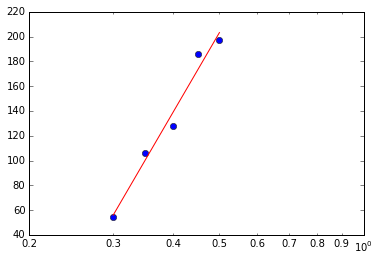

In [89]:
fig, ax = plt.subplots()
ax.semilogx(data1[:,0],data1[:,1], linestyle='None', marker='o')
ax.semilogx(data1[:,0],membthickfunc(data1[:,0], *fitpars), 'r-')
ax.set_xlim(0.2,1.0)
ax.xaxis.set_minor_formatter(FormatStrFormatter("%.1f"))

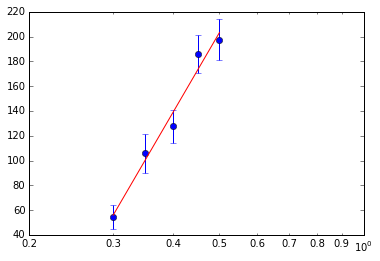

In [92]:
fig, ax = plt.subplots()
ax.set_xscale('log')
ax.errorbar(data1[:,0],data1[:,1],data1[:,2], linestyle='None', marker='o')
ax.plot(data1[:,0],membthickfunc(data1[:,0], *fitpars), 'r-')
ax.set_xlim(0.2,1.0)
ax.xaxis.set_minor_formatter(FormatStrFormatter("%.1f"))